In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

In [2]:
np.random.seed(5)

In [3]:
train = pd.read_csv('../Data/basketball_train.csv')
test = pd.read_csv('../Data/basketball_test.csv')

In [7]:
print(train.shape)
print(test.shape)
print(train.isnull().sum())
print(test.isnull().sum())

(80, 5)
(20, 5)
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


---
### 최적의 k찾기(교차검증-cross validation)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score #< cross validation

In [12]:
# 최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정
max_k_range = train.shape[0] // 2 # << // 정수나눗셈 몫가져오는것 
max_k_range

40

In [13]:
# 최적의 k를 찾기 위해 범위 확인
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list


[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [14]:
# 점수 저장 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train.Pos

In [15]:
# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train,
        y_train,
        cv = 10, # cv:cross validation(교차검증 횟수)
        scoring = 'accuracy' # accuracy : 정확성
    )
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.8375,
 0.85,
 0.85,
 0.825]

In [16]:
# 가장 예측력이 높은 k를 선정한다
cvs = cross_validation_scores
k_list[cvs.index(max(cross_validation_scores))]

3

In [17]:
import matplotlib.pyplot as plt

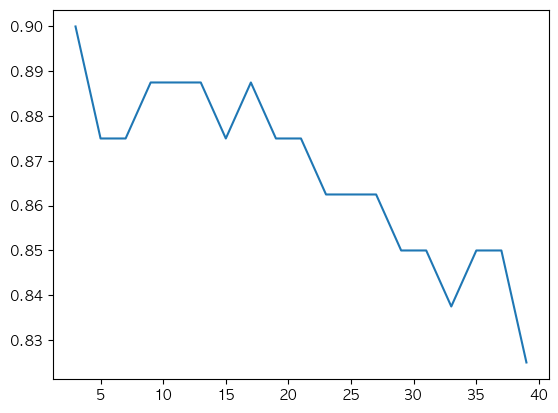

In [18]:
plt.plot(k_list, cross_validation_scores)
plt.show()

In [19]:
# 결과값을 토대로 k값은 3으로 결정
knn = KNeighborsClassifier(n_neighbors=3)

---
### 2개의 특징으로 예측하기(3점슛,블로킹)

In [20]:
x_train = train[['3P','BLK']]
y_train = train.Pos

In [22]:
x_test = test[['3P','BLK']]
y_test = test.Pos

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.score(x_test,y_test)

1.0

In [24]:
pred = knn.predict(x_test)

In [26]:
comparison = pd.DataFrame(
    {
    '예측값':pred,
    '정답':y_test
    }
)
comparison

,예측값,정답
0,SG,SG
1,C,C
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,SG,SG
7,SG,SG
8,SG,SG
9,SG,SG


In [27]:
# 2개의 특징으로 예측하기(3점슛, 블로킹) - confutsion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

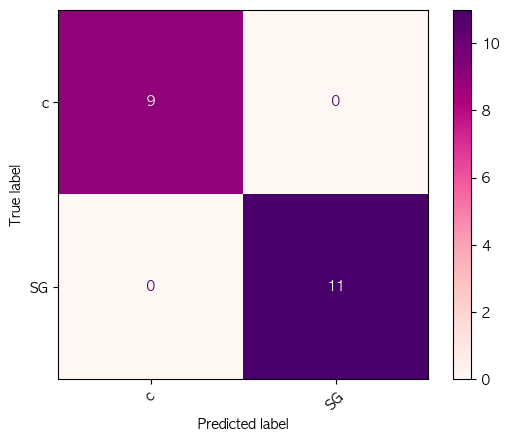

In [29]:

confusion_matrix1 = confusion_matrix(y_test, pred)
target_name = ["c",'SG']

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
    )

disp.plot(
    cmap = plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()

---
### 3개의 특징으로 예측하기 (3점, 블로킹, 리바운드)

In [31]:
x_train = train[['3P','BLK','TRB']]
y_train = train.Pos

In [32]:
x_train = train[['3P','BLK','TRB']]
y_train = train.Pos
x_test = test[['3P','BLK','TRB']]
y_test = test.Pos
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

1.0

In [33]:
pred = knn.predict(x_test)
comparison = pd.DataFrame(
    {
    '예측값':pred,
    '정답':y_test
    }
)
comparison

,예측값,정답
0,SG,SG
1,C,C
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,SG,SG
7,SG,SG
8,SG,SG
9,SG,SG


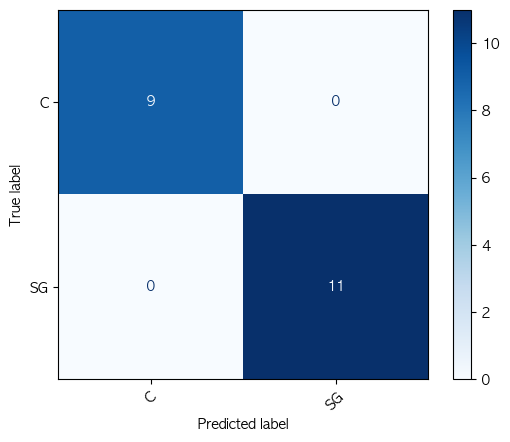

In [39]:

confusion_matrix1 = confusion_matrix(y_test, pred)
target_name = ["C",'SG']

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
    )

disp.plot(
    cmap = plt.cm.Blues,
    xticks_rotation=45
)

plt.show()

---
### 3개의 특징으로 예측하기(3점슛, 블로킹, 리바운드)

3P : 3.5 , BLK : 0.5, TRB :3.7 #= SG

In [45]:
x_train = train[['3P','BLK','TRB']]
y_train = train.Pos
x_test = test[['3P','BLK','TRB']]
y_test = test.Pos
knn.fit(x_train, y_train)
knn.score(list[3.5, 0.5, 3.7],y_test)

ValueError: Expected 2D array, got scalar array instead:
array=list[3.5, 0.5, 3.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
x_train

,3P,BLK,TRB
0,1.9,0.1,1.8
1,3.3,0.5,2.7
2,0.0,0.6,4.5
3,0.0,0.7,4.7
4,1.9,0.5,3.9
...,...,...,...
75,1.2,0.4,2.7
76,1.8,0.1,3.3
77,1.9,0.2,3.4
78,0.0,1.1,7.5


In [44]:
list[3.5, 0.5, 3.7]

list[3.5, 0.5, 3.7]